In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

3 & RRab & 0.124 & 0.040 & 0.052 & 0.106 \\
3 & RRc & 0.096 & 0.079 & 0.044 & 0.034 \\
4 & RRab & 0.154 & 0.045 & 0.046 & 0.140 \\
4 & RRc & 0.219 & 0.057 & 0.054 & 0.205 \\


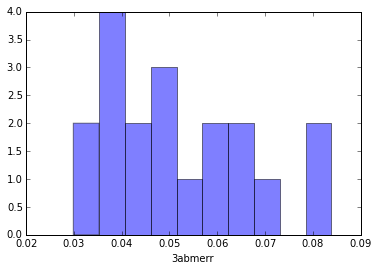

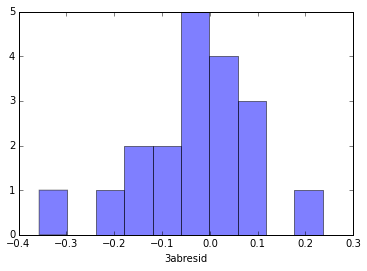

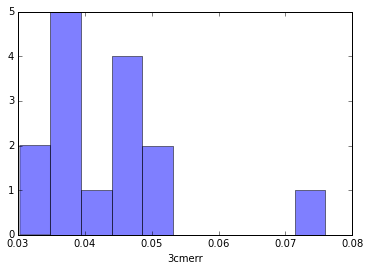

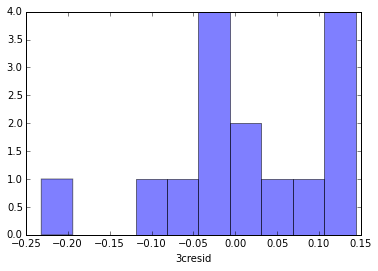

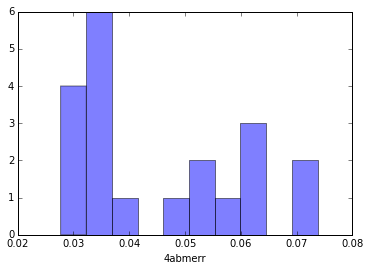

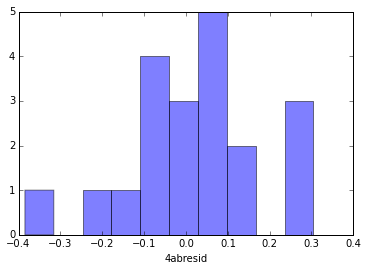

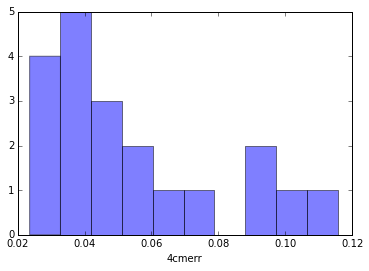

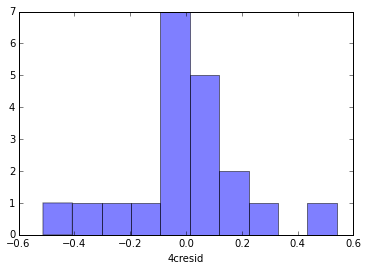

In [2]:
df = pd.read_csv('final_data_files/uncrowded_everything_all_clipped.csv')
df_ab = df[df.type == 0]
df_c = df[df.type == 1]

dfs = [df_ab, df_c] * 2
filts = ['3', '3', '4', '4']

fig = plt.figure()

for i in range(4):
    df1 = dfs[i]
    filt = filts[i]
    if df1.type.any() == 0:
        dftype = 'ab'
    else:
        dftype = 'c'
    if (filt == '3') & (dftype == 'ab'):
        intrinsic_width = 0.040
    if (filt == '3') & (dftype == 'c'):
        intrinsic_width = 0.079
    if (filt == '4') & (dftype == 'ab'):
        intrinsic_width = 0.045
    if (filt == '4') & (dftype == 'c'):
        intrinsic_width = 0.057
    resid_finite = np.isfinite(df1['resid_all_' + filt].values)
    resid3 = df1['resid_all_' + filt].values[resid_finite]
    merr3 = df1['merr_' + filt].values[resid_finite]
    errscale = np.nanmean(merr3)
    fig = plt.figure()
    plt.hist(merr3, alpha=0.5)
    plt.xlabel(filt + dftype + 'merr')
    fig = plt.figure()
    plt.hist(resid3, alpha=0.5)
    plt.xlabel(filt + dftype + 'resid')
    obsscale = np.nanstd(resid3)
    fehscale = np.sqrt(obsscale**2 - intrinsic_width**2 - errscale**2)
    print ' & '.join([filt, 'RR' + dftype] + \
                     ['{:.3f}'.format(i) for i in [obsscale, intrinsic_width, errscale, fehscale]]), r'\\'

In [3]:
df = pd.read_csv('final_data_files/uncrowded_everything_m4_clipped.csv')
df_ab = df[df.type == 0]
df_c = df[df.type == 1]

dfs = [df_ab, df_c, df_ab, df_c]
filts = ['3', '3', '4', '4']

for i in range(4):
    df1 = dfs[i]
    filt = filts[i]
    if df1.type.any() == 0:
        dftype = 'ab'
    else:
        dftype = 'c'
    if (filt == '3') & (dftype == 'ab'):
        intrinsic_width = 0.040
    if (filt == '3') & (dftype == 'c'):
        intrinsic_width = 0.079
    if (filt == '4') & (dftype == 'ab'):
        intrinsic_width = 0.045
    if (filt == '4') & (dftype == 'c'):
        intrinsic_width = 0.057
    resid_finite = np.isfinite(df1.resid_m4_3.values)
    resid3 = df1['resid_m4_' + filt].values[resid_finite]
    merr3 = df1['merr_' + filt].values[resid_finite]
    errscale = np.round(np.nanmean(merr3), decimals=3)
    obsscale = np.round(np.std(resid3), decimals=3)
    fehscale = np.round(np.sqrt(obsscale**2 - intrinsic_width**2 - errscale**2), decimals=3)
    print filt, dftype, obsscale, intrinsic_width, errscale, fehscale

3 ab 0.088 0.04 0.048 0.062
3 c 0.102 0.079 0.041 0.05
4 ab 0.173 0.045 0.047 0.16
4 c 0.202 0.057 0.048 0.188
